# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# launch browser
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [6]:
# extract table
table = soup.find('table', class_='table')

# extract table header
table_headers = table.find_all('th')

# Extract all rows of data
table_rows = table.find_all('tr', class_='data-row')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# scrape table headers

# create an empty list
weather_headers = []

# loop through all headers
for header in table_headers:
    
    header_text = header.get_text() 

    weather_headers.append(header_text)

In [8]:
# scrape table data

# Create an empty list
weather_data = []

# Loop through the scraped data to create a list of rows
for row in table_rows:
    # grab all columns and organize them in a list
    columns = row.find_all('td')

    # scrape columns
    id = columns[0].get_text()
    terrestrial_date = columns[1].get_text()
    sol = columns[2].get_text()
    ls = columns[3].get_text()
    month = columns[4].get_text()
    min_temp = columns[5].get_text()
    pressure = columns[6].get_text()

    # store data in dictionary
    row_data = {
        'id': id,
        'terrestrial_date': terrestrial_date,
        'sol': sol,
        'ls': ls,
        'month': month,
        'min_temp': min_temp,
        'pressure': pressure
    }

    # add row to list
    weather_data.append(row_data)

In [9]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names

df = pd.DataFrame(weather_data)

df.columns = weather_headers

In [10]:
# Confirm DataFrame was created successfully
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [11]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [12]:
# Change data types for data analysis
df['id'] = df['id'].astype(int)
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

In [13]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [14]:
# 1. How many months are there on Mars?
months = df['month'].nunique()

print(f'There are {months} months on Mars')

There are 12 months on Mars


In [15]:
# 2. How many Martian days' worth of data are there?
recorded_days = df['terrestrial_date'].nunique()

print(f'There are {recorded_days} recorded days of data')

There are 1867 recorded days of data


In [16]:
# 3. What is the average low temperature by month?
avg_min_temp_by_month = df['min_temp'].groupby(df['month']).mean()

print('Average Min Temp by Month')
for month, temp in avg_min_temp_by_month.items():
    print(f'Month {month}: {temp:.2f}')

Average Min Temp by Month
Month 1: -77.16
Month 2: -79.93
Month 3: -83.31
Month 4: -82.75
Month 5: -79.31
Month 6: -75.30
Month 7: -72.28
Month 8: -68.38
Month 9: -69.17
Month 10: -71.98
Month 11: -71.99
Month 12: -74.45


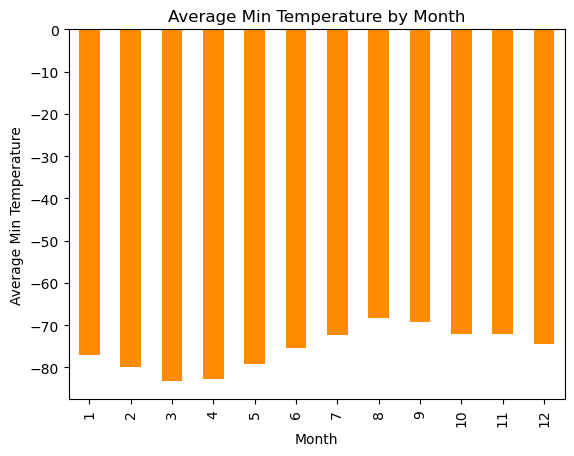

In [17]:
# Plot the average temperature by month

# plot data
avg_min_temp_by_month.plot(kind='bar', color='darkorange')

# format plot
plt.xlabel('Month')
plt.ylabel('Average Min Temperature')
plt.title('Average Min Temperature by Month')

plt.show()

Coldest Month: 3 -83.31
Hottest Month: 8 -68.38


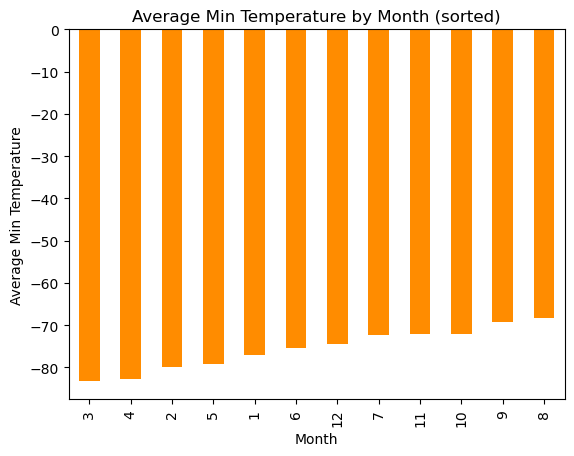

In [25]:
# Identify the coldest and hottest months in Curiosity's location
coldest_avg = avg_min_temp_by_month.min()
coldest_month = avg_min_temp_by_month.idxmin()

hottest_avg = avg_min_temp_by_month.max()
hottest_month = avg_min_temp_by_month.idxmax()

print(f'Coldest Month: {coldest_month} {coldest_avg:.2f}')
print(f'Hottest Month: {hottest_month} {hottest_avg:.2f}')

# plot
# plot data
avg_min_temp_by_month.sort_values().plot(kind='bar', color='darkorange')

# format plot
plt.xlabel('Month')
plt.ylabel('Average Min Temperature')
plt.title('Average Min Temperature by Month (sorted)')

plt.show()

In [19]:
# 4. Average pressure by Martian month
avg_pressure_by_month = df['pressure'].groupby(df['month']).mean()

print('Average Pressure by Month')
for month, pressure in avg_pressure_by_month.items():
    print(f'Month {month}: {pressure:.2f}')

Average Pressure by Month
Month 1: 862.49
Month 2: 889.46
Month 3: 877.32
Month 4: 806.33
Month 5: 748.56
Month 6: 745.05
Month 7: 795.11
Month 8: 873.83
Month 9: 913.31
Month 10: 887.31
Month 11: 857.01
Month 12: 842.16


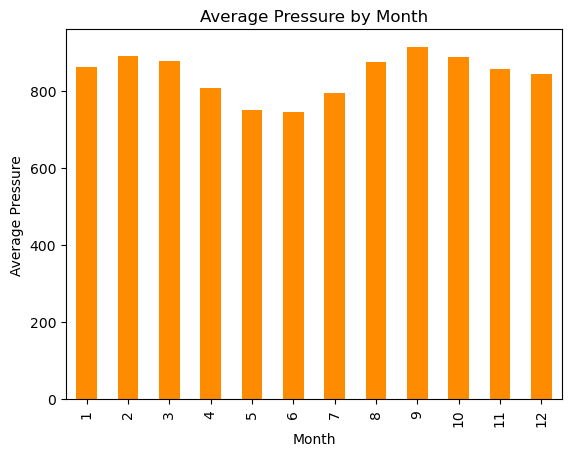

In [20]:
# Plot the average pressure by month

# plot data
avg_pressure_by_month.plot(kind='bar', color='darkorange')

# format plot
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.title('Average Pressure by Month')

plt.show()

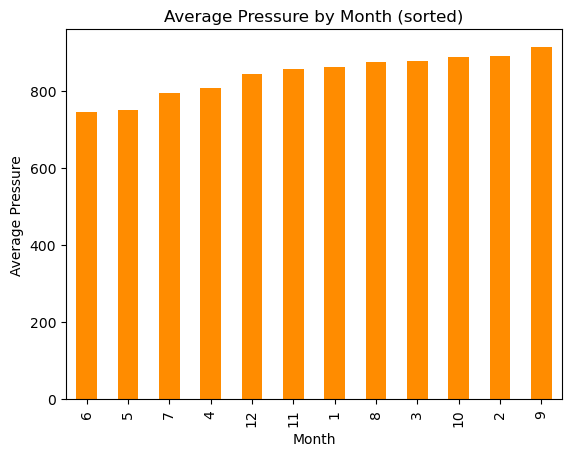

In [26]:
# Plot the average pressure by month sorted

# plot data
avg_pressure_by_month.sort_values().plot(kind='bar', color='darkorange')

# format plot
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.title('Average Pressure by Month (sorted)')

plt.show()

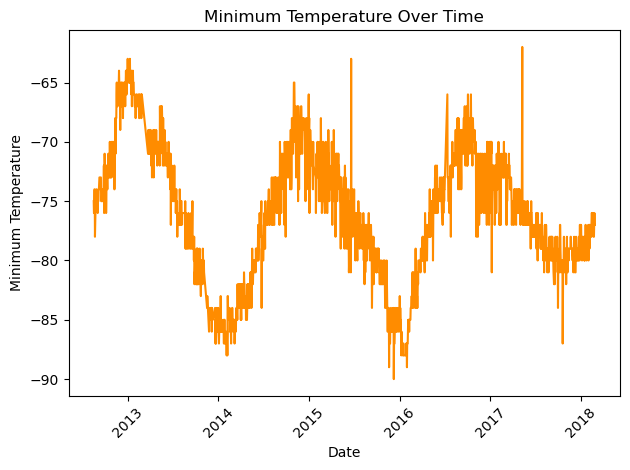

In [30]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# plot daily min temp on mars
plt.plot(df['terrestrial_date'], df['min_temp'], color='darkorange')

# Format plot
plt.xlabel('Date')
plt.ylabel('Minimum Temperature')
plt.title('Minimum Temperature Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.tight_layout()  # Adjust layout for better fit
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [32]:
# Write the data to a CSV
export_path = 'part_2_export/mars_weather.csv'

df.to_csv(export_path, index=False)

In [23]:
browser.quit()